# 基于 stable diffusion 的图生图

可以传递初始图像作为扩散过程的起点.

以下示例演示调用 api 的方式，尝试多次不同的 seed，使用了 `strength` 属性调节。

In [2]:
!pip install xformers

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


## 官方图片示例 - 太空人

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/27 [00:00<?, ?it/s]

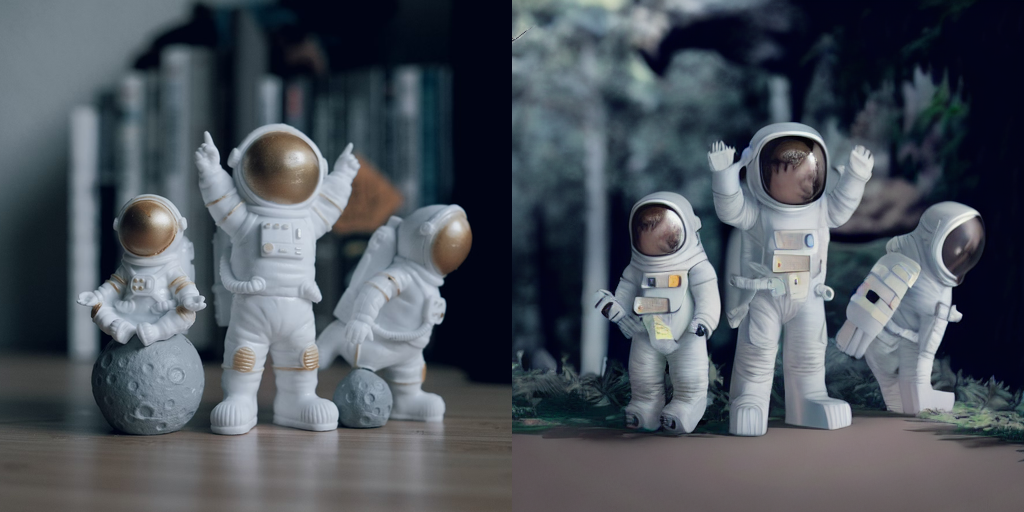

In [35]:
import torch
from diffusers import AutoPipelineForImage2Image
from diffusers.utils import make_image_grid, load_image

model_path="/models/stable-diffusion-v1-5"

pipeline = AutoPipelineForImage2Image.from_pretrained(
    model_path,
    torch_dtype=torch.float16,
    variant="fp16",
    use_safetensors=True
)
pipeline.enable_model_cpu_offload()
pipeline.enable_xformers_memory_efficient_attention()

init_image = load_image("./img2img-init.png")

prompt = "Astronaut in a jungle, cold color palette, muted colors, detailed, 8k"

generator = torch.Generator(device="cuda").manual_seed(7819)

# pass prompt and image to pipeline
image = pipeline(prompt, image=init_image,generator =generator,strength=0.54).images[0]
make_image_grid([init_image, image], rows=1, cols=2)

## 自定义 - 小猫

  0%|          | 0/50 [00:00<?, ?it/s]

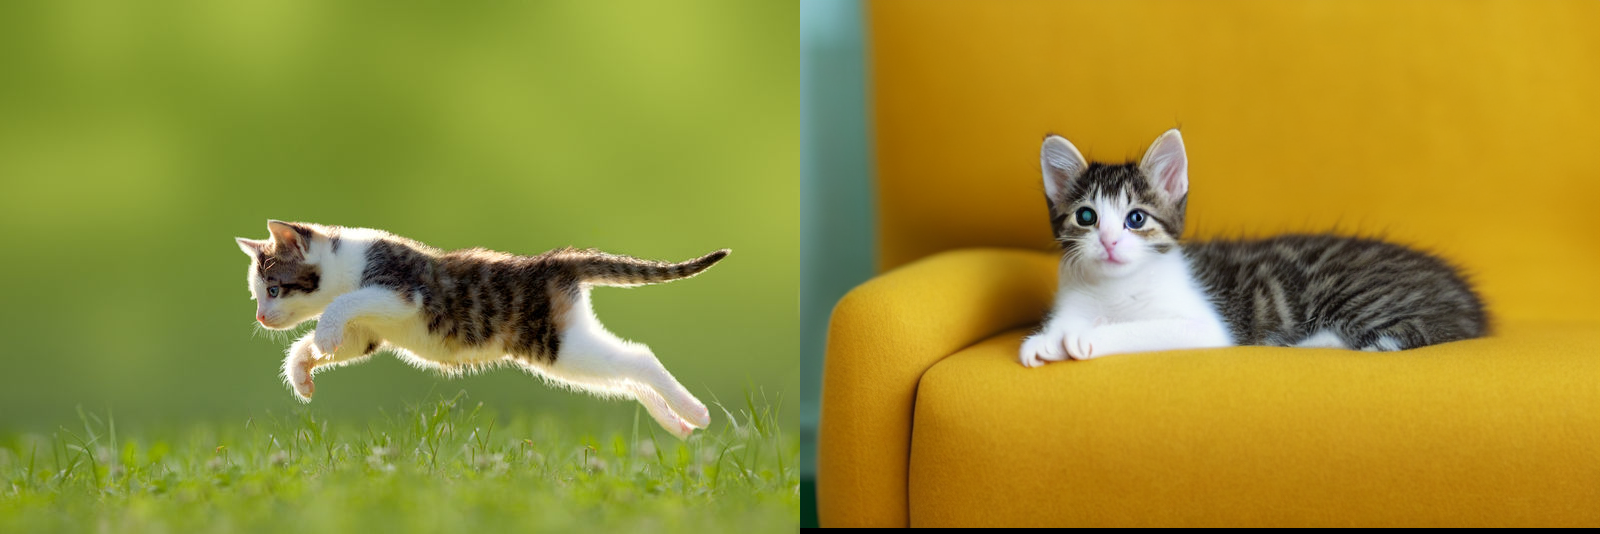

In [46]:
init_image = load_image("./cat-init.jpg")

prompt = "A kitten lying lazily on an orange fabric sofa, 8k"

generator = torch.Generator(device="cuda").manual_seed(11000)

# pass prompt and image to pipeline
image = pipeline(prompt, image=init_image,generator =generator,strength=1).images[0]
make_image_grid([init_image, image], rows=1, cols=2)